In [ ]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
  return datetime.strptime(x, '%Y-%m-%d')

In [ ]:
example = parser('1995-01-20')

example

datetime.datetime(1995, 1, 20, 0, 0)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Datasets/birth.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

In [ ]:
data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
data.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


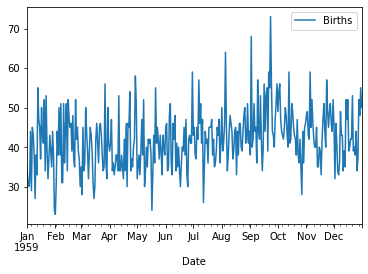

In [ ]:
data.plot()
plt.show()

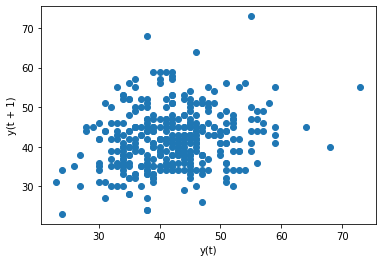

In [ ]:
from pandas.plotting import lag_plot

lag_plot(data)
plt.show()

Apakah ini problem regression ?

In [ ]:
dataframe = pd.DataFrame()
dataframe['month'] = [data.index[i].month for i in range(len(data))]
dataframe['day'] = [data.index[i].day for i in range(len(data))] 
dataframe['birth'] = data['Births'].values
print(dataframe.head(5))

   month  day  birth
0      1    1     35
1      1    2     32
2      1    3     30
3      1    4     31
4      1    5     44


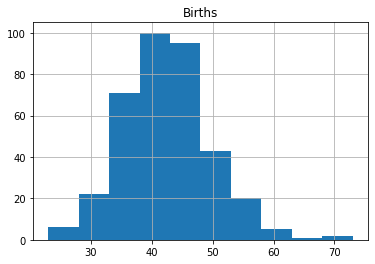

In [ ]:
data.hist()
plt.show()

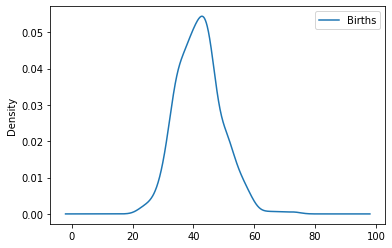

In [ ]:
data.plot(kind='kde')
plt.show()

Box Plot

In [ ]:
# groups = data.groupby(pd.Grouper(freq='M'))
# print(groups) 
# groups.head()
# months = pd.DataFrame()
# for name, group in groups:
#   years[name.year] = group.values.flatten()
# years.boxplot()
# plt.show()

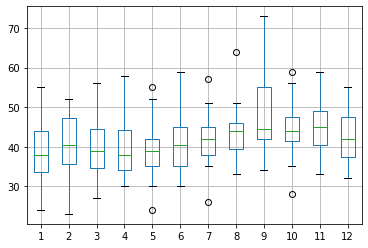

In [ ]:
one_year = data['1959']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)

months.columns = range(1, 13)
months.boxplot()
plt.show()

In [ ]:
values = data.values
values = values.astype('float32')

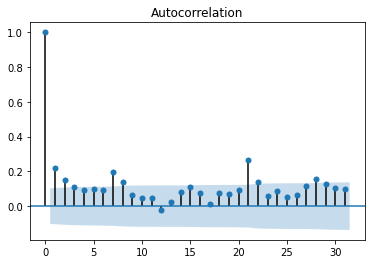

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, lags=31, ax=plt.gca())
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train_size = int(len(values) * 0.80)
train, test = values[0:train_size], values[train_size:]

Auto Regression

In [ ]:
values = data.values
train, test = values[:len(values)-7], values[len(values)-7:]

print(len(values))
print(values)
print(len(values[1:len(values)-7]))
print(len(values[len(values)-7:]))

365
[[35]
 [32]
 [30]
 [31]
 [44]
 [29]
 [45]
 [43]
 [38]
 [27]
 [38]
 [33]
 [55]
 [47]
 [45]
 [37]
 [50]
 [43]
 [41]
 [52]
 [34]
 [53]
 [39]
 [32]
 [37]
 [43]
 [39]
 [35]
 [44]
 [38]
 [24]
 [23]
 [31]
 [44]
 [38]
 [50]
 [38]
 [51]
 [31]
 [31]
 [51]
 [36]
 [45]
 [51]
 [34]
 [52]
 [47]
 [45]
 [46]
 [39]
 [48]
 [37]
 [35]
 [52]
 [42]
 [45]
 [39]
 [37]
 [30]
 [35]
 [28]
 [45]
 [34]
 [36]
 [50]
 [44]
 [39]
 [32]
 [39]
 [45]
 [43]
 [39]
 [31]
 [27]
 [30]
 [42]
 [46]
 [41]
 [36]
 [45]
 [46]
 [43]
 [38]
 [34]
 [35]
 [56]
 [36]
 [32]
 [50]
 [41]
 [39]
 [41]
 [47]
 [34]
 [36]
 [33]
 [35]
 [38]
 [38]
 [34]
 [53]
 [34]
 [34]
 [38]
 [35]
 [32]
 [42]
 [34]
 [46]
 [30]
 [46]
 [45]
 [54]
 [34]
 [37]
 [35]
 [40]
 [42]
 [58]
 [51]
 [32]
 [35]
 [38]
 [33]
 [39]
 [47]
 [38]
 [52]
 [30]
 [34]
 [40]
 [35]
 [42]
 [41]
 [42]
 [38]
 [24]
 [34]
 [43]
 [36]
 [55]
 [41]
 [45]
 [41]
 [37]
 [43]
 [39]
 [33]
 [43]
 [40]
 [38]
 [45]
 [46]
 [34]
 [35]
 [48]
 [51]
 [36]
 [33]
 [46]
 [42]
 [48]
 [34]
 [41]
 [35]
 [40]


In [ ]:
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar)
print('Coefficients:', model_fit.params)

Lag: 16
Coefficients: [ 1.40834899e+01  1.16441795e-01  5.12613263e-02  3.54577231e-02
  1.80977385e-02  5.60358083e-02  1.41369807e-03  1.78015309e-01
  9.58769206e-02  2.92531255e-02  4.63491359e-02  4.78140073e-02
 -5.17788161e-02 -1.09500477e-02  3.18553085e-02  1.66611025e-02
  4.36548521e-03]


In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
  rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

predicted=46.198545, expected=42.000000
predicted=44.645072, expected=38.000000
predicted=43.138759, expected=47.000000
predicted=45.128313, expected=38.000000
predicted=46.020917, expected=36.000000
predicted=43.745163, expected=42.000000
predicted=43.689959, expected=35.000000
predicted=44.824939, expected=28.000000
predicted=43.942789, expected=44.000000
predicted=43.120369, expected=36.000000
predicted=43.563091, expected=45.000000
predicted=44.179916, expected=46.000000
predicted=43.622227, expected=48.000000
predicted=43.266505, expected=49.000000
predicted=43.591838, expected=43.000000
predicted=43.422438, expected=42.000000
predicted=42.994816, expected=59.000000
predicted=43.074740, expected=45.000000
predicted=43.265644, expected=52.000000
predicted=43.076884, expected=46.000000
predicted=42.930670, expected=42.000000
predicted=43.022778, expected=40.000000
predicted=42.997569, expected=40.000000
predicted=42.802837, expected=45.000000
predicted=42.754197, expected=35.000000


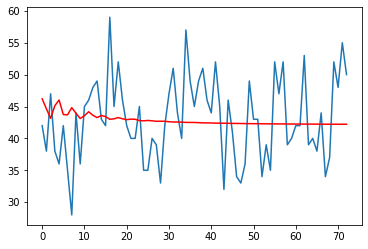

In [ ]:
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

***No. 1 Plot dataset yang digunakan***

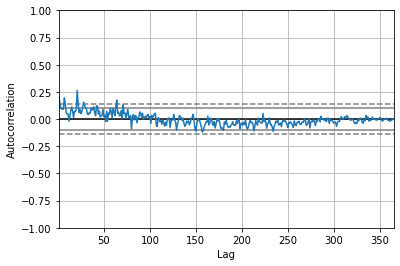

In [ ]:
pd.plotting.autocorrelation_plot(data)
plt.show()

Terdapat korelasi positif pada rentang angka 0-50, maka akan di coba dengan variable p = 10

***No.2***

Pada dataset birth, terdapat trend. Karena data tidak berbentuk stationary, dan grafik output menunjukan kecenderungan terhadap waktu.

***No.3***

**ARIMA MODEL**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(data, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Births   No. Observations:                  364
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1231.585
Method:                       css-mle   S.D. of innovations              7.119
Date:                Thu, 17 Sep 2020   AIC                           2487.170
Time:                        11:04:11   BIC                           2533.936
Sample:                    01-02-1959   HQIC                          2505.757
                         - 12-31-1959                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0327      0.077      0.422      0.673      -0.119       0.185
ar.L1.D.Births     -0.7923      0.052    -15.134      0.000      -0.895      -0.690
ar.L2.D.Births     -0.6647      

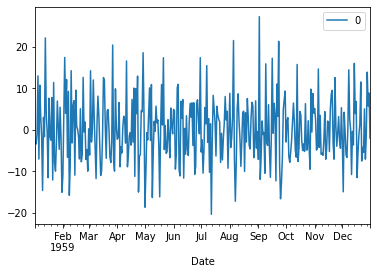

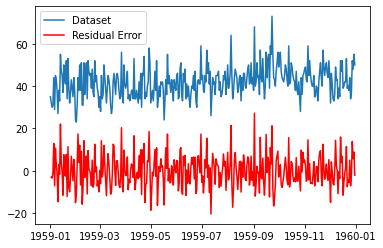

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

plt.plot(data)
plt.plot(residuals, color='red')
plt.legend(['Dataset', 'Residual Error'])

In [ ]:
residuals

,0
Date,
1959-01-02,-3.049577
1959-01-03,-3.459159
1959-01-04,-1.138551
1959-01-05,12.929800
1959-01-06,-7.082418
...,...
1959-12-27,-1.321896
1959-12-28,13.833310
1959-12-29,5.677312


In [ ]:
print(residuals.describe())

                0
count  364.000000
mean    -0.007873
std      7.804431
min    -20.383961
25%     -5.409250
50%     -0.574061
75%      4.829771
max     27.198210


Rolling Forecast ARIMA Model (Predictions)

In [ ]:
values = data.values
size = int(len(values)* 0.80)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  prediction = output[0]
  predictions.append(prediction)
  expected = test[t]
  history.append(expected)
  print('predicted=%f, expected=%f' % (prediction, expected))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=45.426043, expected=42.000000
predicted=43.235598, expected=38.000000
predicted=40.728970, expected=47.000000
predicted=42.803120, expected=38.000000
predicted=40.889627, expected=36.000000
predicted=39.830018, expected=42.000000
predicted=39.004320, expected=35.000000
predicted=37.512464, expected=28.000000
predicted=34.238576, expected=44.000000
predicted=36.396850, expected=36.000000
predicted=36.149172, expected=45.000000
predicted=41.918251, expected=46.000000
predicted=42.842770, expected=48.000000
predicted=46.587646, expected=49.000000
predicted=47.911780, expected=43.000000
predicted=46.415062, expected=42.000000
predicted=44.398615, expected=59.000000
predicted=49.101457, expected=45.000000
predicted=48.617977, expected=52.000000
predicted=51.938741, expected=46.000000
predicted=47.720262, expected=42.000000
predicted=46.254851, expected=40.000000
predicted=42.420349, expected=40.000000
predicted=40.618997, expected=45.000000
predicted=42.020356, expected=35.000000


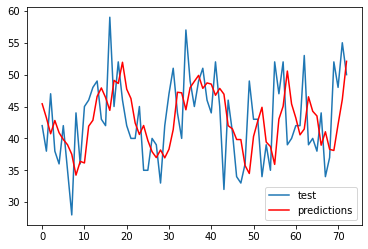

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test', 'predictions'])

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.80)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

  # evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=42.758
ARIMA(0, 0, 1) MSE=40.041
ARIMA(0, 0, 2) MSE=39.387
ARIMA(0, 1, 0) MSE=59.450
ARIMA(0, 1, 1) MSE=48.197
ARIMA(0, 1, 2) MSE=45.905
ARIMA(0, 2, 0) MSE=170.288
ARIMA(0, 2, 1) MSE=59.846
ARIMA(1, 0, 0) MSE=39.374
ARIMA(1, 0, 1) MSE=45.336
ARIMA(1, 1, 0) MSE=48.267
ARIMA(1, 1, 1) MSE=45.659
ARIMA(1, 1, 2) MSE=46.690
ARIMA(1, 2, 0) MSE=101.034
ARIMA(2, 0, 0) MSE=38.877
ARIMA(2, 0, 1) MSE=42.865
ARIMA(2, 0, 2) MSE=43.669
ARIMA(2, 1, 0) MSE=44.790
ARIMA(2, 1, 1) MSE=45.282
ARIMA(2, 1, 2) MSE=45.725
ARIMA(2, 2, 0) MSE=78.250
ARIMA(3, 0, 0) MSE=38.776
ARIMA(3, 0, 1) MSE=42.513
ARIMA(3, 0, 2) MSE=42.530
ARIMA(3, 1, 0) MSE=43.615
ARIMA(3, 1, 1) MSE=45.553
ARIMA(3, 1, 2) MSE=46.060
ARIMA(3, 2, 0) MSE=64.958
ARIMA(4, 0, 0) MSE=38.870
ARIMA(4, 0, 1) MSE=41.810
ARIMA(4, 0, 2) MSE=41.235
ARIMA(4, 1, 0) MSE=44.188
ARIMA(4, 1, 1) MSE=45.739
ARIMA(4, 1, 2) MSE=44.677
ARIMA(4, 2, 0) MSE=58.560
ARIMA(5, 0, 0) MSE=39.427
ARIMA(5, 0, 1) MSE=40.162
ARIMA(5, 0, 2) MSE=43.969
ARIMA(5, 1

In [ ]:
print('RMSE ARIMA((3, 0, 0)) :', sqrt(38.776))

RMSE ARIMA((3, 0, 0)) : 6.227037819059717


Hyperparameter terbaik untuk ARIMA (3, 0, 0).
p=3 maka legnya 3, d = 0 karena grafiknya stationary. q nilai parameter moving averagenya adalah 0.
Nilai RMSE ARIMA terbaik = 6.227037819059717

***No.4***

**SARIMA**

In [ ]:
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [3]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = 16

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(data.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(3, 0, 0), (0, 0, 0, 0), 'n']] 7.271
 > Model[[(3, 0, 0), (0, 0, 1, 0), 'n']] 6.431
 > Model[[(3, 0, 0), (1, 0, 0, 0), 'n']] 7.137
 > Model[[(3, 0, 0), (0, 0, 2, 0), 'n']] 6.425
 > Model[[(3, 0, 0), (1, 0, 1, 0), 'n']] 6.364
 > Model[[(3, 0, 0), (1, 0, 2, 0), 'n']] 6.409
 > Model[[(3, 0, 0), (2, 0, 0, 0), 'n']] 7.000
 > Model[[(3, 0, 0), (2, 0, 1, 0), 'n']] 6.472
 > Model[[(3, 0, 0), (0, 0, 0, 0), 'c']] 6.541
 > Model[[(3, 0, 0), (2, 0, 2, 0), 'n']] 6.132
 > Model[[(3, 0, 0), (0, 0, 1, 0), 'c']] 6.603
 > Model[[(3, 0, 0), (0, 0, 2, 0), 'c']] 6.506
 > Model[[(3, 0, 0), (1, 0, 0, 0), 'c']] 6.582
 > Model[[(3, 0, 0), (1, 0, 1, 0), 'c']] 6.614
 > Model[[(3, 0, 0), (1, 0, 2, 0), 'c']] 6.485
 > Model[[(3, 0, 0), (2, 0, 0, 0), 'c']] 6.569
 > Model[[(3, 0, 0), (2, 0, 1, 0), 'c']] 6.622
 > Model[[(3, 0, 0), (0, 0, 0, 0), 't']] 7.194
 > Model[[(3, 0, 0), (2, 0, 2, 0), 'c']] 6.584
 > Model[[(3, 0, 0), (0, 0, 1, 0), 't']] 6.426
 > Model[[(3, 0, 0), (0, 0, 2, 0), 't']] 6.441
 > Model[[(3,


Nilai RMSE SARIMA Terbaik [(3, 0, 2), (1, 0, 2, 0), 't'] = 6.071827237674967. Dataset terdapat trend 't' linear, hal ini terlihat pada grafik plot yang menurun-menaik dan terdapat kecenderungan terhadap waktu. p=3 maka legnya 3, d = 0 karena grafiknya stationary. q nilai parameter moving averagenya adalah 2.


***No. 5***

Nilai RMSE ARIMA (3, 0, 0) : 6.227037819059717. 
Nilai RMSE SARIMA Terbaik [(3, 0, 2), (1, 0, 2, 0), 't'] : 6.071827237674967.

Dari dataset sales, disimpulkan nilai rmse arima lebih baik dibandingkan sarima.Hal ini disebabkan karena dataset sales, terdapat trend (linear) sehingga lebih cocok menggunakan algoritma SARIMA